### Agent-Lab: ReACT RAG Agent

Objective of this notebook is evaluating and adapting the implementation of [ReAct Agent](https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/) with retrieval evaluation.

#### Preparation steps:

Before executing the notebook perform the following preparation steps.

1. Start Docker containers: `docker compose up -d --build`

2. Verify application is up and running, with web browser: `http://localhost:18000/docs`

3. Inside project root directory, create a `.env` file with env vars with correct values:

    ```
    DEVELOPING="True"
    OLLAMA_ENDPOINT="http://localhost:11434"
    ```

---

In [1]:
%%capture

import os
os.chdir('..')

from dotenv import load_dotenv
load_dotenv()

from IPython.display import Markdown, display

from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

In [2]:
# create agent
agent = experiment_utils.create_ollama_agent(
    agent_type="react_rag",
    llm_tag="phi4-mini:latest",
    ollama_endpoint=os.getenv("OLLAMA_ENDPOINT")
)

# create attachment
# attachment_id = experiment_utils.create_attachment(
#     file_path="tests/integration/sun_tzu_the_art_of_war.zip",
#     content_type="application/zip",
# )
#
# processed_attachment = experiment_utils.create_embeddings(
#     attachment_id,
#     language_model_id=agent["language_model_id"],
#     collection_name="static_document_data"
# )

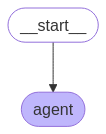

In [3]:
# get agent instance
react_rag_agent = container.react_rag_agent()

# Create Graph
workflow = react_rag_agent.get_workflow(agent["id"])
experiment_utils.print_graph(workflow)

In [4]:
agent_config = {
    "configurable": {
        "thread_id": agent["id"],
    },
    "recursion_limit": 30
}

In [5]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=agent["id"]
)

inputs = react_rag_agent.get_input_params(message)
result = workflow.invoke(inputs, agent_config)

In [6]:
display(Markdown(f"```json\n{react_rag_agent.format_response(result)}\n```"))

```json
[
  "{\"content\":\"<query>What is the pinnacle of excellence?</query> <context>Hence to fight and conquer in all your battles is not supreme excellence; supreme excellence consists in breaking the enemy\u2019s resistance without fighting.\\n\\n[Here again, no modern strategist but will approve the words of the old Chinese general. Moltke\u2019s greatest triumph, the capitulation of the huge French army at Sedan, was won practically without bloodshed.]\\n\\nThus the highest form of generalship is to baulk the enemy\u2019s plans;\\n---\\nNeither is it the acme of excellence if you fight and conquer and the whole Empire says, \\\"Well done!\\\"\\n\\n[True excellence being, as Tu Mu says: \\\"To plan secretly, to move surreptitiously, to foil the enemy\u2019s intentions and balk his schemes, so that at last the day may be won without shedding a drop of blood.\\\" Sun Tz\u016d reserves his approbation for things that\\n\\n\\\"the world\u2019s coarse thumb And finger fail to plumb.\\\"\\n\\nTo lift an autumn hair is no sign of great strength;\\n---\\nThus on the one hand we have ability to protect ourselves; on the other, a victory that is complete.\\n\\nTo see victory only when it is within the ken of the common herd is not the acme of excellence.\\n---\\nThe Commander stands for the virtues of wisdom, sincerity, benevolence, courage and strictness.\\n---\\n[Literally, \\\"hides under the ninth earth,\\\" which is a metaphor indicating the utmost secrecy and concealment, so that the enemy may not know his whereabouts.\\\"]\\n\\nhe who is skilled in attack flashes forth from the topmost heights of heaven.\\n\\n[Another metaphor, implying that he falls on his adversary like a thunderbolt, against which there is no time to prepare. This is the opinion of most of the commentators.]\\n---\\nMaking no mistakes is what establishes the certainty of victory, for it means conquering an enemy that is already defeated.\\n\\nHence the skilful fighter puts himself into a position which makes defeat impossible, and does not miss the moment for defeating the enemy.\\n\\n[A \\\"counsel of perfection\\\" as Tu Mu truly observes. \\\"Position\\\" need not be confined to the actual ground occupied by the troops. It includes all the arrangements and preparations which a wise general will make to increase the safety of his army.]\\n---\\nThe consummate leader cultivates the moral law, and strictly adheres to method and discipline; thus it is in his power to control success.\\n\\nIn respect of military method, we have, firstly, Measurement; secondly, Estimation of quantity; thirdly, Calculation; fourthly, Balancing of chances; fifthly, Victory.\\n\\nMeasurement owes its existence to Earth; Estimation of quantity to Measurement; Calculation to Estimation of quantity; Balancing of chances to Calculation; and Victory to Balancing of chances.</context>\",\"additional_kwargs\":{},\"response_metadata\":{},\"type\":\"human\",\"name\":null,\"id\":\"385ae54c-4117-4151-a687-81c5c3725d02\",\"example\":false}",
  "{\"content\":\"<thinking>\\nThe user is asking about the concept or principle that represents \\\"the pinnacle\\\" in excellence within a certain context, which seems related to strategy and perhaps military tactics based on ancient Chinese wisdom. I need to distill key insights from provided quotes emphasizing subtlety over direct confrontation.\\n</thinking>\\n\\n<response>The peak of supreme excellence isn't found through overt aggression but rather lies subtly; it involves overcoming challenges without engaging in battle directly or letting others know the full extent until it's too late for your adversaries, as suggested by Sun Tzu. This reflects a strategic depth that values foresight and indirect action over brute force.\\n\\n</response>\",\"additional_kwargs\":{},\"response_metadata\":{\"model\":\"phi4-mini:latest\",\"created_at\":\"2025-03-29T18:38:28.376161Z\",\"done\":true,\"done_reason\":\"stop\",\"total_duration\":8675362584,\"load_duration\":926214667,\"prompt_eval_count\":760,\"prompt_eval_duration\":3795146458,\"eval_count\":129,\"eval_duration\":3948608042,\"message\":{\"role\":\"assistant\",\"content\":\"\",\"images\":null,\"tool_calls\":null}},\"type\":\"ai\",\"name\":null,\"id\":\"run-3de65fd6-629c-4952-96b9-e6ec3ebcb7e5-0\",\"example\":false,\"tool_calls\":[],\"invalid_tool_calls\":[],\"usage_metadata\":{\"input_tokens\":760,\"output_tokens\":129,\"total_tokens\":889}}"
]
```

In [7]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=agent["id"]
)

inputs = react_rag_agent.get_input_params(message)
result = workflow.invoke(inputs, agent_config)

In [8]:
display(Markdown(f"```json\n{react_rag_agent.format_response(result)}\n```"))

```json
[
  "{\"content\":\"<query>What is the pinnacle of excellence?</query> <context>Hence to fight and conquer in all your battles is not supreme excellence; supreme excellence consists in breaking the enemy\u2019s resistance without fighting.\\n\\n[Here again, no modern strategist but will approve the words of the old Chinese general. Moltke\u2019s greatest triumph, the capitulation of the huge French army at Sedan, was won practically without bloodshed.]\\n\\nThus the highest form of generalship is to baulk the enemy\u2019s plans;\\n---\\nNeither is it the acme of excellence if you fight and conquer and the whole Empire says, \\\"Well done!\\\"\\n\\n[True excellence being, as Tu Mu says: \\\"To plan secretly, to move surreptitiously, to foil the enemy\u2019s intentions and balk his schemes, so that at last the day may be won without shedding a drop of blood.\\\" Sun Tz\u016d reserves his approbation for things that\\n\\n\\\"the world\u2019s coarse thumb And finger fail to plumb.\\\"\\n\\nTo lift an autumn hair is no sign of great strength;\\n---\\nThus on the one hand we have ability to protect ourselves; on the other, a victory that is complete.\\n\\nTo see victory only when it is within the ken of the common herd is not the acme of excellence.\\n---\\nThe Commander stands for the virtues of wisdom, sincerity, benevolence, courage and strictness.\\n---\\n[Literally, \\\"hides under the ninth earth,\\\" which is a metaphor indicating the utmost secrecy and concealment, so that the enemy may not know his whereabouts.\\\"]\\n\\nhe who is skilled in attack flashes forth from the topmost heights of heaven.\\n\\n[Another metaphor, implying that he falls on his adversary like a thunderbolt, against which there is no time to prepare. This is the opinion of most of the commentators.]\\n---\\nMaking no mistakes is what establishes the certainty of victory, for it means conquering an enemy that is already defeated.\\n\\nHence the skilful fighter puts himself into a position which makes defeat impossible, and does not miss the moment for defeating the enemy.\\n\\n[A \\\"counsel of perfection\\\" as Tu Mu truly observes. \\\"Position\\\" need not be confined to the actual ground occupied by the troops. It includes all the arrangements and preparations which a wise general will make to increase the safety of his army.]\\n---\\nThe consummate leader cultivates the moral law, and strictly adheres to method and discipline; thus it is in his power to control success.\\n\\nIn respect of military method, we have, firstly, Measurement; secondly, Estimation of quantity; thirdly, Calculation; fourthly, Balancing of chances; fifthly, Victory.\\n\\nMeasurement owes its existence to Earth; Estimation of quantity to Measurement; Calculation to Estimation of quantity; Balancing of chances to Calculation; and Victory to Balancing of chances.</context>\",\"additional_kwargs\":{},\"response_metadata\":{},\"type\":\"human\",\"name\":null,\"id\":\"385ae54c-4117-4151-a687-81c5c3725d02\",\"example\":false}",
  "{\"content\":\"<thinking>\\nThe user is asking about the concept or principle that represents \\\"the pinnacle\\\" in excellence within a certain context, which seems related to strategy and perhaps military tactics based on ancient Chinese wisdom. I need to distill key insights from provided quotes emphasizing subtlety over direct confrontation.\\n</thinking>\\n\\n<response>The peak of supreme excellence isn't found through overt aggression but rather lies subtly; it involves overcoming challenges without engaging in battle directly or letting others know the full extent until it's too late for your adversaries, as suggested by Sun Tzu. This reflects a strategic depth that values foresight and indirect action over brute force.\\n\\n</response>\",\"additional_kwargs\":{},\"response_metadata\":{\"model\":\"phi4-mini:latest\",\"created_at\":\"2025-03-29T18:38:28.376161Z\",\"done\":true,\"done_reason\":\"stop\",\"total_duration\":8675362584,\"load_duration\":926214667,\"prompt_eval_count\":760,\"prompt_eval_duration\":3795146458,\"eval_count\":129,\"eval_duration\":3948608042,\"message\":{\"role\":\"assistant\",\"content\":\"\",\"images\":null,\"tool_calls\":null}},\"type\":\"ai\",\"name\":null,\"id\":\"run-3de65fd6-629c-4952-96b9-e6ec3ebcb7e5-0\",\"example\":false,\"tool_calls\":[],\"invalid_tool_calls\":[],\"usage_metadata\":{\"input_tokens\":760,\"output_tokens\":129,\"total_tokens\":889}}",
  "{\"content\":\"<query>Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.</query> <context>[Mei Yao-ch\u2019en says: \\\"plentifully provided with roads and means of communications.\\\"]\\n\\n(2) entangling ground;\\n\\n[The same commentator says: \\\"Net-like country, venturing into which you become entangled.\\\"]\\n\\n(3) temporising ground;\\n\\n[Ground which allows you to \\\"stave off\\\" or \\\"delay.\\\"]\\n\\n(4) narrow passes; (5) precipitous heights; (6) positions at a great distance from the enemy.\\n---\\nTherefore in chariot fighting, when ten or more chariots have been taken, those should be rewarded who took the first. Our own flags should be substituted for those of the enemy, and the chariots mingled and used in conjunction with ours. The captured soldiers should be kindly treated and kept.\\n\\nThis is called, using the conquered foe to augment one\u2019s own strength.\\n\\nIn war, then, let your great object be victory, not lengthy campaigns.\\n---\\n[The five cardinal virtues of the Chinese are (1) humanity or benevolence; (2) uprightness of mind; (3) self-respect, self-control, or \\\"proper feeling;\\\" (4) wisdom; (5) sincerity or good faith. Here \\\"wisdom\\\" and \\\"sincerity\\\" are put before \\\"humanity or benevolence,\\\" and the two military virtues of \\\"courage\\\" and \\\"strictness\\\" substituted for \\\"uprightness of mind\\\" and \\\"self-respect, self-control, or \u2018proper feeling.\u2019\\\"]\\n---\\nBy persistently hanging on the enemy\u2019s flank,\\n\\n[I understand the first four words to mean \\\"accompanying the enemy in one direction.\\\" Ts\u2019ao Kung says: \\\"unite the soldiers and make for the enemy.\\\" But such a violent displacement of characters is quite indefensible.]\\n\\nwe shall succeed in the long run\\n\\n[Literally, \\\"after a thousand li.\\\"]\\n\\nin killing the commander-in-chief.\\n\\n[Always a great point with the Chinese.]\\n\\nThis is called ability to accomplish a thing by sheer cunning.\\n---\\n[That is, cutting up the army into regiments, companies, etc., with subordinate officers in command of each. Tu Mu reminds us of Han Hsin\u2019s famous reply to the first Han Emperor, who once said to him: \\\"How large an army do you think I could lead?\\\" \\\"Not more than 100,000 men, your Majesty.\\\" \\\"And you?\\\" asked the Emperor. \\\"Oh!\\\" he answered, \\\"the more the better.\\\"]\\n---\\nIf asked how to cope with a great host of the enemy in orderly array and on the point of marching to the attack, I should say: \\\"Begin by seizing something which your opponent holds dear; then he will be amenable to your will.\\\"\\n---\\n[Owing to the double meanings in the Chinese text, the latter part of the sentence is susceptible of quite a different meaning: \\\"And thus, the weapon not being blunted by use, its keenness remains perfect.\\\"]\\n\\nThis is the method of attacking by stratagem.\\n\\nIt is the rule in war, if our forces are ten to the enemy\u2019s one, to surround him; if five to one, to attack him;\\n\\n[Straightway, without waiting for any further advantage.]\\n\\nif twice as numerous, to divide our army into two.</context>\",\"additional_kwargs\":{},\"response_metadata\":{},\"type\":\"human\",\"name\":null,\"id\":\"e654bf60-a3e5-46b0-8a6e-cad770dda5d9\",\"example\":false}",
  "{\"content\":\"<thinking>\\nThe user wants a translation of both their original question and my previous response from English to Dutch. The explanation must be concise with no more than ten words per sentence.\\n</thinking>\\n\\n<response>Kunt u mij mijn vorige vraag en antwoord herhalen in het Nederlands, alstublieft? Maximaal tien woorden per zin.\\n\\n[Voormee Yao-ch\u2019en zegt: \\\"rijk aan wegen en communicatiemiddelen.\\\"]\\n\\n(2) verstrengelde grond;\\n\\n[Dezelfde commentator zegt: \\\"net-gewerkte land waarin je verdraaien raakt.\\\"]\\n\\n(3) temporeuze grond;\\n\\n[Grootte die je 'stuwt' of verzacht.]\\n\\n(4) smalle doorgangen; (5) steile heuvels; (6) posities op een grote afstand van de vijand.\\n\\n---\\nDaarom in karrieteren, wanneer er tien of meer karren zijn genomen, moeten degenen worden beloond die het eerste hebben genomen. Onze vlaggen zouden vervangen worden door de vijandse en de kartonnen meegecombineerd met onze eigen. De veroverde soldaten zouden vriendelijk behandeld en behouden.\\n\\nDit wordt \\\"versterken van je eigen kracht met behulp van de verwoeste tegenstander\\\" genoemd.\\n\\nIn oorlog, dan, let je groot doel overwinning zijn, niet lange campagnes.\\n---\\nDe vijfnevenige principes van het Chinese zijn (1) welwillende(nheid); (2) onberispelijke wil; (3) zelfrespect, zelfcontrole of 'gereguleerde gevoelens'; (4) wijsheid; (5) trouwtaling. Hier \\\"wijsheid\\\" en \\\"toevallig\\\" voor \\\"welwillende(nheid)\\\" geplaatst worden, en de twee militaire nobels van \\\"valiantheid\\\" en \\\"strenge discipline\\\" vervangen door \\\"onberispelijke wil\\\" en \\\"zelfrespect, zelfcontrole of 'gereguleerde gevoelens.'\\\"\\n---\\nDoor vast te houden aan het flankenpunt van de vijand,\\n\\n[Ik begrijp de eerste vier woorden als: 'aanbenaderend de vijand in \u00e9\u00e9n richting.'] Ts\u2019ao Kung zegt: 'de soldaten samenvoegen en voorover trekken.'\\n\\nDat wordt indegenlijk als heerschappij over een thing door list.\\n---\\nHet is de regel van oorlog, dat wanneer onze troepen tien tot \u00e9\u00e9n zijn, we hem omringen; vijf tegen een; twee keer zo.\\n\\n[Straightway, zonder wachten op enige nadere voordelen.]\\n\\nBijtweedsoets blijven onblonden.\\n\\n[Deel je leger in eenheden, companies, enz. met ondercommissarissen die elk een afdeling leiden.]\\n---\\nAls iemand vraagt hoe te omgaan met een grote vijandige trop van de array en klaar om aan te vallen, zou ik zeggen: \\\"Begin door iets vast te nemen wat uw tegenstander waardeert; dan wordt hij bereid je te gehoorzaken.\\\"\\n---\",\"additional_kwargs\":{},\"response_metadata\":{\"model\":\"phi4-mini:latest\",\"created_at\":\"2025-03-29T18:39:23.775832Z\",\"done\":true,\"done_reason\":\"stop\",\"total_duration\":23092078459,\"load_duration\":13381750,\"prompt_eval_count\":1596,\"prompt_eval_duration\":2539784917,\"eval_count\":598,\"eval_duration\":20526331708,\"message\":{\"role\":\"assistant\",\"content\":\"\",\"images\":null,\"tool_calls\":null}},\"type\":\"ai\",\"name\":null,\"id\":\"run-45ac6b4a-2f05-4d25-93cb-f5253e3e736f-0\",\"example\":false,\"tool_calls\":[],\"invalid_tool_calls\":[],\"usage_metadata\":{\"input_tokens\":1596,\"output_tokens\":598,\"total_tokens\":2194}}"
]
```